# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from mdutils.mdutils import MdUtils
from calendar import monthrange
from datetime import datetime
import io
from PIL import Image

In [9]:
# IMPORT LOG CSV/EXCEL

#df_music = pd.read_excel('musiclog. 2023-02-21.xlsx', sheet_name=0, header=None)
df_music = pd.read_csv('musiclog. 2023-03-17.csv', header=None)
#df_music = pd.read_csv('musiclog. 2023-02-21.csv', header=None, parse_dates=3) turn to datetime the 3rd column
df_music

,0,1,2,3
0,熊田茜音 | Akane Kumada,スーパーカブ｜Super Cub｜OP+ED,まほうのかぜ | Mahou no Kaze,16/03/2023 23:58:54 +00:00
1,YuNi,宇崎ちゃんは遊びたい!｜Uzaki-chan wa Asobitai!｜OP+ED,ココロノック Kokoro Knock,16/03/2023 23:54:50 +00:00
2,スフィア | sphere,花咲くいろは｜Hanasaku Iroha｜ED,Hazy,16/03/2023 23:50:49 +00:00
3,SUEMITSU & THE SUEMITH,のだめカンタービレ｜Nodame Cantabile｜OP+ED,サジタリウス | Sagittarius,16/03/2023 23:44:17 +00:00
4,BUMP OF CHICKEN,"3月のライオン｜Sangatsu no Lion, March Comes In like ...",アンサー | Answer,16/03/2023 23:38:47 +00:00
...,...,...,...,...
28404,Built to Spill,You in Reverse,Liar,03/01/2022 15:45:24 +00:00
28405,Built to Spill,You in Reverse,Goin' Against Your Mind,03/01/2022 15:40:12 +00:00
28406,Built to Spill,Keep It Like a Secret,Carry the Zero,03/01/2022 15:30:59 +00:00
28407,Built to Spill,Keep It Like a Secret,Else,03/01/2022 15:25:04 +00:00


In [10]:
# RENAME AND REORDER COLUMNS

df_music.rename({0: 'Artist', 1: 'Album', 2: 'Track', 3: 'Time'}, axis=1, inplace=True)
df_music = df_music[['Time', 'Track','Album','Artist']]
df_music

,Time,Track,Album,Artist
0,16/03/2023 23:58:54 +00:00,まほうのかぜ | Mahou no Kaze,スーパーカブ｜Super Cub｜OP+ED,熊田茜音 | Akane Kumada
1,16/03/2023 23:54:50 +00:00,ココロノック Kokoro Knock,宇崎ちゃんは遊びたい!｜Uzaki-chan wa Asobitai!｜OP+ED,YuNi
2,16/03/2023 23:50:49 +00:00,Hazy,花咲くいろは｜Hanasaku Iroha｜ED,スフィア | sphere
3,16/03/2023 23:44:17 +00:00,サジタリウス | Sagittarius,のだめカンタービレ｜Nodame Cantabile｜OP+ED,SUEMITSU & THE SUEMITH
4,16/03/2023 23:38:47 +00:00,アンサー | Answer,"3月のライオン｜Sangatsu no Lion, March Comes In like ...",BUMP OF CHICKEN
...,...,...,...,...
28404,03/01/2022 15:45:24 +00:00,Liar,You in Reverse,Built to Spill
28405,03/01/2022 15:40:12 +00:00,Goin' Against Your Mind,You in Reverse,Built to Spill
28406,03/01/2022 15:30:59 +00:00,Carry the Zero,Keep It Like a Secret,Built to Spill
28407,03/01/2022 15:25:04 +00:00,Else,Keep It Like a Secret,Built to Spill


In [11]:
# TURN INTO DATETIME

#df_music['Time'] = pd.to_datetime(df_music['Time'], format='%Y-%m-%d %H:%M:%S').dt.tz_localize(None) #created issues
df_music['Time'] = pd.to_datetime(df_music['Time'], infer_datetime_format = True).dt.tz_localize(None)
df_music


,Time,Track,Album,Artist
0,2023-03-16 23:58:54,まほうのかぜ | Mahou no Kaze,スーパーカブ｜Super Cub｜OP+ED,熊田茜音 | Akane Kumada
1,2023-03-16 23:54:50,ココロノック Kokoro Knock,宇崎ちゃんは遊びたい!｜Uzaki-chan wa Asobitai!｜OP+ED,YuNi
2,2023-03-16 23:50:49,Hazy,花咲くいろは｜Hanasaku Iroha｜ED,スフィア | sphere
3,2023-03-16 23:44:17,サジタリウス | Sagittarius,のだめカンタービレ｜Nodame Cantabile｜OP+ED,SUEMITSU & THE SUEMITH
4,2023-03-16 23:38:47,アンサー | Answer,"3月のライオン｜Sangatsu no Lion, March Comes In like ...",BUMP OF CHICKEN
...,...,...,...,...
28404,2022-01-03 15:45:24,Liar,You in Reverse,Built to Spill
28405,2022-01-03 15:40:12,Goin' Against Your Mind,You in Reverse,Built to Spill
28406,2022-01-03 15:30:59,Carry the Zero,Keep It Like a Secret,Built to Spill
28407,2022-01-03 15:25:04,Else,Keep It Like a Secret,Built to Spill


# MANIPULATING DATA

In [68]:
# INITIAL PREPARATIONS. WHICH MONTH?

month_ndays = monthrange(2023, 3)[1]
range_month = str('2023-03')
range_month_dt = pd.to_datetime(range_month)


df_music_m = df_music.loc[(df_music['Time'] >= range_month_dt ) & (df_music['Time'] <= (range_month_dt + pd.DateOffset(months=1)) )]
df_music_m = df_music_m.sort_values(["Time"], ascending=True)
df_music_m = df_music_m.replace("\|", "｜", regex=True)
#df_music_m['Track'] = np.where(df_music_m['Track'].str.contains('\|'),'"' + df['colB'] + '"' , df['colB']) # replace using numpy


df_music_m['Day'] = df_music_m['Time'].dt.normalize()
df_music_m['Hour'] = df_music_m['Time'].dt.time
df_music_m['Hour'] = pd.to_datetime(df_music_m['Hour'], format = '%H:%M:%S')



In [69]:
# CALCULATING FREQUENT PARAMETERS

df_top_m0 = df_music_m['Day'].value_counts().rename_axis('Day').reset_index(name='#').iloc[:25]
df_top_m1 = df_music_m['Track'].value_counts().rename_axis('Track').reset_index(name='#').iloc[:25]
df_top_m2 = df_music_m['Album'].value_counts().rename_axis('Album').reset_index(name='#').iloc[:25]
df_top_m3 = df_music_m['Artist'].value_counts().rename_axis('Artist').reset_index(name='#').iloc[:25]

df_top_m = pd.concat([df_top_m0, df_top_m1, df_top_m2, df_top_m3], axis=1)

df_top_m


,Day,#,Track,#,Album,#,Artist,#
0,2023-03-03,129.0,Intro,14,Heartleap,41,Bert Jansch,66
1,2023-03-09,91.0,Curragh Of Kildare,12,The Last Summer (Deluxe Edition),31,Grimes,58
2,2023-03-04,84.0,Brooklyn (Owes The Charmer Under Me),12,Visions,29,Vashti Bunyan,48
3,2023-03-08,82.0,Running from Home - 2015 Remaster,10,Bert Jansch,27,R Plus,31
4,2023-03-07,80.0,Across the Water,10,Can't Buy A Thrill,25,Steely Dan,25
5,2023-03-10,77.0,Genesis,9,Cendre,24,Fennesz,24
6,2023-03-06,69.0,Oblivion,7,Art Angels,23,Haruomi Hosono,24
7,2023-03-13,56.0,青い花 ｜ Aoi Hana,7,Three Chord Trick,21,Elliott Smith,22
8,2023-03-01,50.0,The Waggoner's Lad - 2015 Remaster,6,The Tide's Magnificence: Songs and Poems of Mo...,18,Molly Drake,18
9,2023-03-11,49.0,Fly to You (feat. Grimes and Dido),5,Among My Swan,12,Dido,17


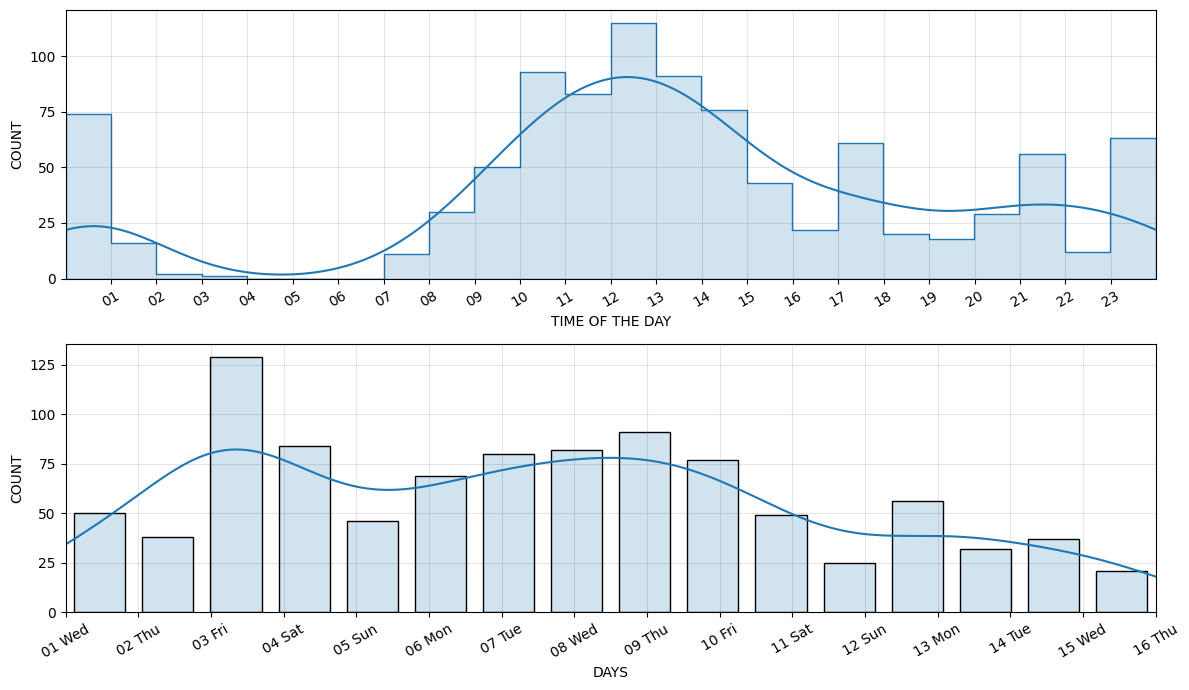

In [70]:
# GRAPHING MONTHLY SUMMARY

fig,axs = plt.subplots(2,1, figsize = (12,7))


ax1 = plt.subplot(211)
ax1 = sns.histplot(data=df_music_m, x='Hour', stat='count', fill=True, bins=24, kde=True, element='step', alpha=0.2)

ax1 = plt.gca()
ax1.grid(which='major', color='k', linestyle='-', alpha=0.1, zorder=0)
ax1.set_xlabel('TIME OF THE DAY')
ax1.set_xlim(df_music_m['Hour'].min(), df_music_m['Hour'].max())
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax1.tick_params(axis='x', labelrotation=30)
ax1.set_ylabel('COUNT')
ax1.yaxis.set_major_locator(plt.MultipleLocator(25))


ax2 = plt.subplot(212)
ax2 = sns.histplot(data=df_music_m, x='Day', stat='count', fill=True, bins=df_music_m['Day'].nunique(), shrink=0.75, kde=True, element='bars', alpha=0.2)

ax2= plt.gca()
ax2.grid(which='major', color='k', linestyle='-', alpha=0.1, zorder=0)
ax2.set_xlabel('DAYS')
ax2.set_xlim(df_music_m['Day'].min(), df_music_m['Day'].max())
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
ax2.tick_params(axis='x', labelrotation=30)
ax2.set_ylabel('COUNT')
ax2.yaxis.set_major_locator(plt.MultipleLocator(25))


plt.tight_layout()


# SAVING FIGURE
fig.savefig('MusicLog-Monthly - ' + range_month + '.jpg')


In [71]:
# RUN FOR LOOP FOR DAILY ACCOUNT, WRITE TO MARKDOWN.

df_music_mc = df_music_m.copy()
df_music_mc.drop(['Day','Hour'], axis=1, inplace=True)


mdFile = MdUtils(file_name='MusicLog-Monthly - ' + range_month)



for i in range(1, month_ndays+1):
    
    whichday = range_month_dt + pd.DateOffset(days=i-1)
    whichday_str = datetime.strftime(whichday, '%Y-%m-%d %a')
    
    # SLICING DAILY LOG
    df_music_d = df_music_mc.loc[(df_music_mc['Time'].dt.date == whichday  ) ]
    df_music_d.reset_index(drop=True, inplace=True)
    
    md_music_table = df_music_d.to_markdown()
    
    
    
    # PREPARING TOP LOG
    df_top_d0 = df_music_d['Track'].value_counts().rename_axis('Track').reset_index(name='#').iloc[:5]
    df_top_d1 = df_music_d['Album'].value_counts().rename_axis('Album').reset_index(name='#').iloc[:5]
    df_top_d2 = df_music_d['Artist'].value_counts().rename_axis('Artist').reset_index(name='#').iloc[:5]

    df_top_d = pd.concat([df_top_d0, df_top_d1, df_top_d2], axis=1)
    
    md_top_table = df_top_d.to_markdown()
    
    
    
    # WRITING TO MARKDOWN
    mdFile.new_header(level=1, title="[[" + whichday_str + "]]")
    
    mdFile.new_header(level=2, title="Log")
    mdFile.new_line(md_music_table)
    mdFile.new_line()
    
    mdFile.new_header(level=2, title="Top")
    mdFile.new_line(md_top_table)
    mdFile.new_line()
    


# WRITING MONTHLY SUMMARY
md_topm_table = df_top_m.to_markdown()
mdFile.new_header(level=1, title="Monthly Summary")
mdFile.new_line(md_topm_table)
mdFile.new_line()


# ADDING GRAPHS
mdFile.new_line("![[" + "MusicLog-Monthly - " + range_month + ".jpg]]")
mdFile.new_line()


# CREATING MARKDOWN
mdFile.create_md_file()

C:\Users\Yugen\AppData\Local\Temp\ipykernel_10116\1353114282.py:17: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_music_d = df_music_mc.loc[(df_music_mc['Time'].dt.date == whichday  ) ]
C:\Users\Yugen\AppData\Local\Temp\ipykernel_10116\1353114282.py:17: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_music_d = df_music_mc.loc[(df_music_mc['Time'].dt.date == whichday  ) ]
C:\Users\Yugen\AppData\Local\Temp\ipykernel_10116\1353114282.py:17: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will 

# OTHERS

In [ ]:
music_month = pd.to_datetime('2023-02-07')

df_music_s = df_music.loc[(df_music['Time'].dt.date == music_month ) ]
# df_music_d = df_music.loc[(df_music['Time'] > music_date) & (df_music['Time'] + pd.DateOffset(days=-1) <= music_date )]

df_music_s.reset_index(drop=True, inplace=True)

#df_music_d = df_music_d[['Time', 'Track', 'Album', 'Artist']]

#df_music_d.to_csv('abc.csv')

markdown = df_music_s.to_markdown()


mdFile = MdUtils(file_name='MusicLog-Daily-7')

mdFile.new_paragraph(markdown)
mdFile.create_md_file()


In [ ]:
# df_top = df_music_m
# df_top['Time'] = df_music_m['Time'].dt.normalize()
# df_top1 = df_top.apply(lambda x: pd.Series(x.value_counts().index[:5]))
# df_top1


#df_top2 = df_top['Track'].value_counts().iloc[:5].rename_axis('val').reset_index(name='count')
#df_top3 = df_top.apply(lambda x: x.value_counts().reset_index.iloc[:5])

#df_top3


# df_top4 = (df_top.groupby('Time')['Track']
#              .value_counts()
#              .rename_axis(['Time', 'most_freq'])
#              .reset_index(name='freq')
#              .drop_duplicates('Time'))


# df_top4 = df_music_m.apply(lambda x: x.value_counts()
#              .rename_axis('most_freq')
#              .reset_index(name='freq').iloc[:5])

# df_top4

In [22]:
df_music_m2 = df_music_m.groupby([pd.Grouper(key='Day',freq='d')]).size().reset_index(name='count')

df_music_m2


,Day,count
0,2023-01-01,52
1,2023-01-02,105
2,2023-01-03,102
3,2023-01-04,148
4,2023-01-05,137
5,2023-01-06,122
6,2023-01-07,107
7,2023-01-08,137
8,2023-01-09,100
9,2023-01-10,99


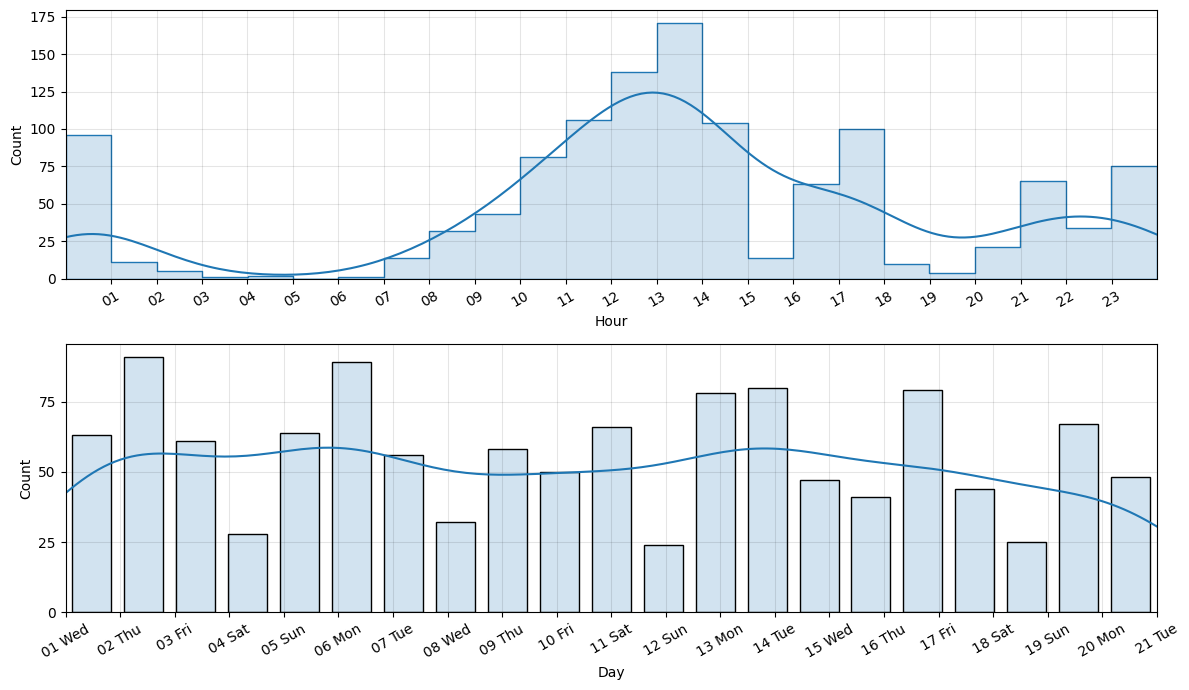

In [52]:

fig,axs = plt.subplots(2,1, figsize = (12,7))


ax1 = plt.subplot(211)
ax1 = sns.histplot(data=df_music_m, x='Hour', stat='count', fill=True, bins=24, kde=True, element='step', alpha=0.2)
#ax1 = sns.barplot(data=df_music_s2, x='Time', y='count', alpha=0.2)

ax1 = plt.gca()
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax1.yaxis.set_major_locator(plt.MultipleLocator(25))
# ax1.yaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
#plt.gcf().autofmt_xdate()


#ax1.set_xticks(np.arange(0, 100, 50))

ax1.grid(which='major', color='k', linestyle='-', alpha=0.1, zorder=0)
#ax1.set_xlabel('TIME OF THE DAY')
#ax1.set_ylabel('COUNT')
#ax1.set_xlabel('')
#ax1.set_ylabel('')
ax1.tick_params(axis='x', labelrotation=30)
ax1.set_xlim(df_music_m['Hour'].min(), df_music_m['Hour'].max())

plt.tight_layout()




ax2 = plt.subplot(212)
ax2 = sns.histplot(data=df_music_m, x='Day', stat='count', fill=True, bins=df_music_m['Day'].nunique(), shrink=0.75, kde=True, element='bars', alpha=0.2)

ax2= plt.gca()
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
ax2.yaxis.set_major_locator(plt.MultipleLocator(25))
#plt.gcf().autofmt_xdate()


#ax2.set_xticks(np.arange(0, 100, 50))

ax2.grid(which='major', color='k', linestyle='-', alpha=0.1, zorder=0)
#ax2.set_xlabel('TIME OF THE DAY')
#ax2.set_ylabel('COUNT')
#ax2.set_xlabel('')
#ax2.set_ylabel('')
ax2.tick_params(axis='x', labelrotation=30)
ax2.set_xlim(df_music_m['Day'].min(), df_music_m['Day'].max())

plt.tight_layout()

# SAVING FIGURE
fig.savefig('MusicLog-Monthly - ' + range_month + '.jpg')



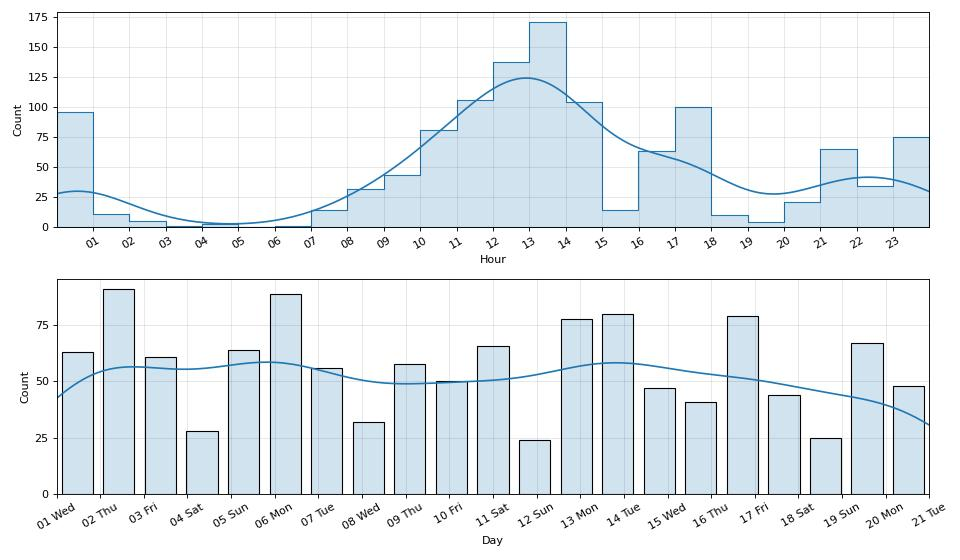

In [56]:
# ASSIGNING FIGURE TO A VARIABLE USING PILLOW LIBRARY

with io.BytesIO() as out:
    fig.savefig(out, format="jpg", dpi=80)  # Add dpi= to match your figsize
    pic = Image.open(out)  # pic
    # pix = np.array(pic.getdata(), dtype=np.uint8).reshape(pic.size[1], pic.size[0], -1) # to numpy array

pic
